https://docs.pytest.org/en/latest/

In [3]:
def diff2nd(f, x, h=1E-6):
    r = (f(x-h) - 2*f(x) + f(x+h))/float(h*h)
    return r


def g(t):
    return t**(-6)

In [9]:
t = 1.2
d2g = diff2nd(g, t)
print("t = {:2}, d2g = {:2}".format(t, d2g))

t = 1.2, d2g = 9.767797681803359


In [12]:
for k in range(1, 15):
    h = 10**(-k)
    d2g = diff2nd(g, 1, h)
    print("h = {:2}, d2g = {}".format(h, d2g))

h = 0.1, d2g = 44.61503532126975
h = 0.01, d2g = 42.025209242574356
h = 0.001, d2g = 42.00025200151725
h = 0.0001, d2g = 42.00000252030378
h = 1e-05, d2g = 41.99999237286533
h = 1e-06, d2g = 42.000736222291835
h = 1e-07, d2g = 41.94422587033842
h = 1e-08, d2g = 47.739590058881724
h = 1e-09, d2g = -666.1338147750939
h = 1e-10, d2g = 0.0
h = 1e-11, d2g = 0.0
h = 1e-12, d2g = -666133814.775094
h = 1e-13, d2g = 66613381477.50939
h = 1e-14, d2g = 0.0


In [13]:
from math import *

def f(x):
    e = exp(-0.1*x)
    s = sin(6*pi*x)
    return e*s


x = 2
y = f(x)
print("f({:2})={:2}".format(x, y))

f( 2)=-1.203187195344543e-15


## Lambda $\lambda$

In [30]:
f = lambda x: x**2 + 4
#def f(x):
#    return x**2 + 4

In [32]:
d2 = diff2nd(lambda t: t**(-6), 1, h =1E-4)
print(d2)

42.00000252030378


In [42]:
d2 = diff2nd(lambda t, A=1, a=0.5: -a*2*t*A*exp(-a*t**2), 1.2)
print(d2) # Evalulado en t=1.2

0.9112710586123285


In [44]:
def f(x):
    if 0 <= x <= pi:
        value = sin(x)
    else:
        value = 0
    return value


print(f(x=0))

0.0


In [47]:
def N(x):
    if x < 0:
        return 0.0
    elif 0 <= x < 1:
        return x
    elif 1 <= x < 2:
        return 2 - x
    elif x >= 2:
        return 0.0
    

print(N(x=1))

1


In [54]:
def f(x):
    return (sin(x) if 0 <= x <= 2*pi else 0)


print(f(x=3*pi))

0


In [57]:
f = lambda x: sin(x) if 0 <= x <= 2*pi else 0
print(f(x=2*pi))

-2.4492935982947064e-16


In [60]:
import random

def generate_string(N, alphabet='ACGT'):
    return ''.join([random.choice(alphabet) for i in range(N)])


dna = generate_string(600000)
print(dna)

CCTCAGGGCGTGCGAAGGCTCTAGAACCGCGTGCCGGCGTATGCACTGTGATTATGACGACAGGGAGAGATCACTGGAAGACACGTTGTGGCGCACTTCGAGTGCCCGAACGCATAACAGAGAACACCTGTTGGGACCCGATGCTGGCCCATATACATCTGCTAATGGATTCAGCTGCTGACCCGGCACAATGGGCGGTAGGGTCTCAGTTATTGTTTGCCACCCATGATGTCTTCTCAGCTCCAGTCGCTACTCTTGAAGAGAGCTGGGATTACACACCTTGTTTCAAGACATAATCGGCTTTTGGCGGCGTCCGTGAAGGTTATCGGATGGTGGCCGCGCCTTCAAAACACCAGGTGAACGATTAGGTTGGTCGAAATGTCTTAGTTCGATCCACGGTTTATTCATACCGTGGGTAATAGATTCCCACTATTTTTCGCCCCAAATTGTTCACCTTCCGTCCCCGCATGATTATTGTTCCATTCCTATGACACTACAGGAAACAGCGTTGCGCGCCTGAAACACGTCGTCGCTTAAAATTCCCAGAGGTTTGAGCGCTATGGTTCAGTTGATGACTAGCCCCCGAGTGCTAAGCGCCGTTAGGTGAGGTCCCTTAGCCAACAGGTTATAAAATTCACATTTAGAAAAGAGGATATACTACCTATATAGCGGTACGTTGTGCACAGCCGGAATGGGTCCGTGTGCGGCGCTGCCATCGTGGCCGATCGACTGTGCAACCGGTTTCTGCCTATACATACTACGGACTTCGCGGAGAATAGCCCGCACAAATCTTTTTTACGCCCGAAGAGAGTCCAGGGCTCAGGGATAGATTGATACATATAAGAACCGTTGAATGAGTTTAGCCCACGAGTCCATACCCAAAGATCGCGATTTTTGCCAACGAAGGATCGGAGGTCGAGCGAAGAGGATACTGTGAGTAACCAGAGCACTGCCCTCGATCATCACGGTGACGCCGTCACTTTTCTTGCAATTGACATTT

In [66]:
import time

t0 = time.perf_counter()

t1 = time.perf_counter()

cpu_time = t1 - t0

print(cpu_time)

2.2079999780544313e-05


In [68]:
import pytest
def f():
    raise SystemExit(1)

def test_mytest():
    with pytest.raises(SystemExit):
        f()

In [90]:
def Simpson(f, a, b, n = 500):
    h = (b - a)/n
    sum1 = 0
    for i in range(1, n/2 + 1):
        sum1 += f(a + (2*i-1)*h)
        
    sum2 = 0
    for i in range(1, n/2):
        sum2 += f(a + 2*i*h)
    
    integral = (b-a)/(3*n)*(f(a) + f(b) + 4*sum1 + 2*sum2)
    return integral


def h(x):
    return (3./2)*sin(x)**3

In [91]:
# FIXME
from math import sin, pi

def application():
    print("Integral of 1.6*sin(x)**3 from 0 to pi:")
    for n in 2, 6, 12, 100, 500:
        approx = Simpson(h, 0, pi, n)
        print("n = {:2}, approx = {:2}, error = {:2}".format(n, approx, approx))

In [93]:
from math import sin
A = 0.1
w = 1
t = 0.6
x = A*sin(w*t)
print(x)

0.05646424733950354


In [95]:
from math import factorial as fct
value = fct(5)
print(value)

120


In [97]:
from math import log as ln

def present_amount(A0, p, s):
    return A0*(1 + p/(360.0*100))**n


def initial_amount(A, p, n):
    return A*(1 + p/(360.0*100))**(-n)

def annual_rate(A0, A, n):
    return 360*100*((A/A0)**(1.0/n) - 1)

In [98]:
# Do not run
from interest import days
A0 = 1; A = 2; p = 5
n = days(A0, 2, p)
years = n/365.0
print("Money has doubled after {:2}", years)

ModuleNotFoundError: No module named 'interest'

In [119]:
# %load mymod.py

In [122]:
import mymod
print(mymod.add1(4))

5


In [120]:
%run mymod.py

Run as program.


IndexError: list index out of range

In [115]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [128]:
from interest import present_amount
present_amount(2, 5, 730)

NameError: name 'n' is not defined

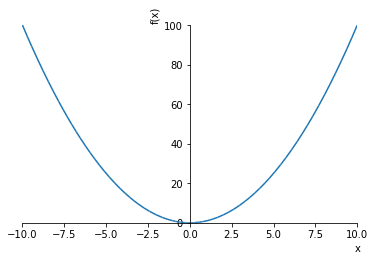

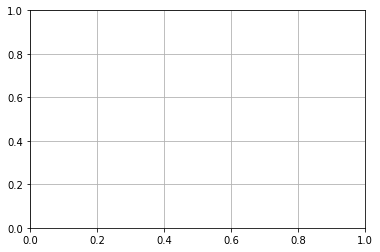

In [7]:
from sympy import plot, symbols
from matplotlib.pyplot import grid
x = symbols('x')
plot(x**2); grid()

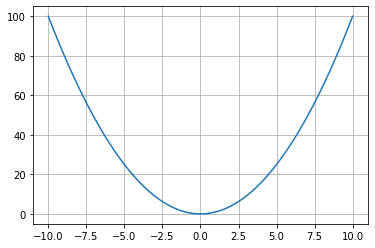

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify
a = np.linspace(-10, 10, 1000) # Replace with your desired range and number of points
f = lambdify(x, x**2)
plt.plot(a, f(a)); grid()

In [19]:
a, b, c, d, x, y, z = symbols('a, b, c, d, x, y, z')
eq = a*x + b*y+ c*z - d
eq

a*x + b*y + c*z - d

In [20]:
eq.coeff(x)

a

In [21]:
eq.coeff(y)

b

In [22]:
eq.coeff(z)

c